<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load Data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [80]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


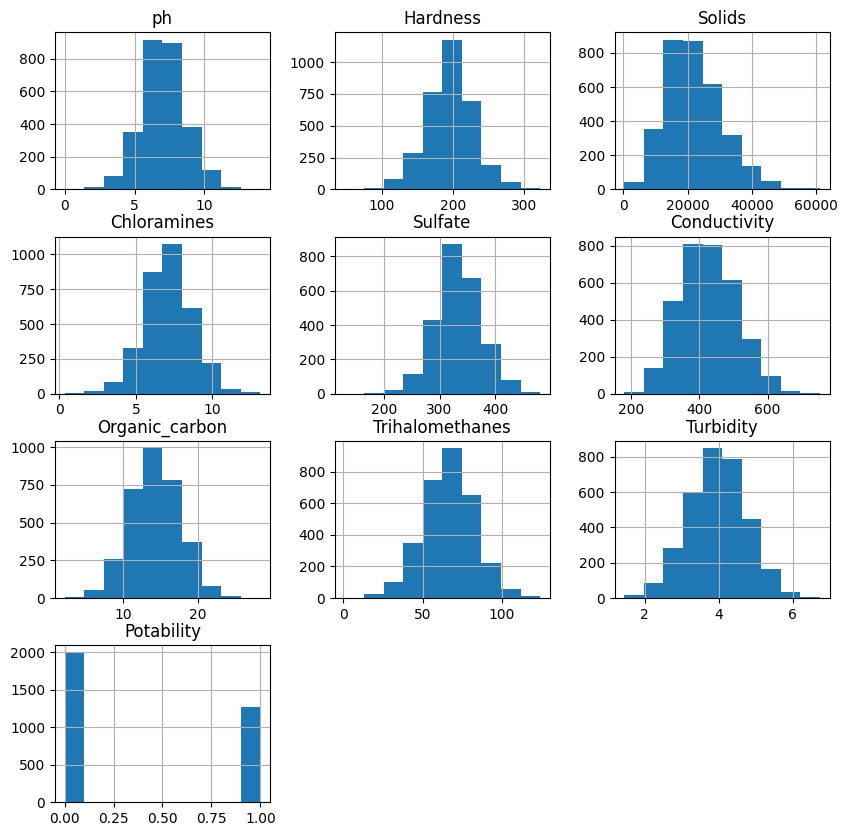

In [81]:

# Histogram
df.hist(figsize=(10, 10))
plt.show()


<Axes: xlabel='Potability'>

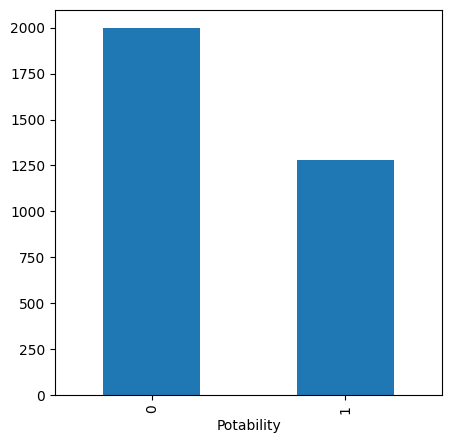

In [82]:
# Bar Plot for the Outcome ("Potability")
plt.figure(figsize=(5, 5))
df['Potability'].value_counts().plot(kind='bar')

# Ελλειπείς τιμές, ποσοστά πόσιμου και μη-πόσιμου νερού και ποιότητα δεδομένων

In [83]:
# Ελλιπείς τιμές
missing_values = df.isnull().sum()
print("Χαρακτηριστικό      Πλήθος ελλειπών τιμών:\n-------------------------------------\n", missing_values)

Χαρακτηριστικό      Πλήθος ελλειπών τιμών:
-------------------------------------
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [84]:
# 2. Υπολόγισε τα ποσοστά χρησιμοποιώντας value_counts(normalize=True)
percentages = (df['Potability'].value_counts(normalize=True) * 100).round(2)
percentages

# Πόσιμο νερό 61% και μη πόσιμο 39%

,proportion
Potability,
0,60.99
1,39.01


*Ποιοότητα των δεδομένων:*

Τα δεδομένα μας σε γενικές γραμμές έχουν καλή ποιότητα, αλλά όχι τέλεια. Με την σωστή επεξεργασία και την συμπλήρωση των ελλειπών τιμών (που είναι αρκετές) τα δεδομένα μας θα έχουν ακόμα καλύερη ποιότητα.

#Ποσοστά πόσιμου και μη-πόσιμου νερού  για:
#α) pH < 6.5 ,
#β) 6.5 ≤ pH ≤ 8.5 ,
#γ) pH > 8.5

In [85]:
mask_6_5 = df['ph'] < 6.5
mask_8_5 = df['ph'] > 8.5
mask_6_8 = (df['ph'] >= 6.5) & (df['ph'] <= 8.5)

# Show percentaces for each mask
print("--- Ποσοστά για pH < 6.5 ---")
print(df.loc[mask_6_5, 'Potability'].value_counts(normalize=True) * 100)

print("\n--- Ποσοστά για pH μεταξύ 6.5 και 8.5 ---")
print(df.loc[mask_6_8, 'Potability'].value_counts(normalize=True) * 100)


print("\n--- Ποσοστά για pH < 6.5 ---")
print(df.loc[mask_8_5, 'Potability'].value_counts(normalize=True) * 100)



--- Ποσοστά για pH < 6.5 ---
Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64

--- Ποσοστά για pH μεταξύ 6.5 και 8.5 ---
Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64

--- Ποσοστά για pH < 6.5 ---
Potability
0    66.871166
1    33.128834
Name: proportion, dtype: float64


Σχόλιο: όπως φαίνονται από τα αποτελέσματα, το μεγαλύτερο ποσοστό πόσιμο νερού φαίνεται για pH μεταξύ [6.5 , 8.5] στο 43.9%, οπότε επιβεβαιώνουμε τα προτεινόμενα επίπεδα του Παγκόσμιου Οργανισμού Υγείας.
Ωστόσο, φαίνεται πάλι και στο συγκεκριμένο επίπεδο ότι το ποσοστό μη πόσιμου νερού είναι μεγάλο (56%). Άρα καταλαβαίνουμε ότι είναι σημανικός παράγοντας το pH αλλά χρειαζόμαστε και τα υπόλοιπα χαρακτηριστικά.


# Διάγραμμα διασποράς

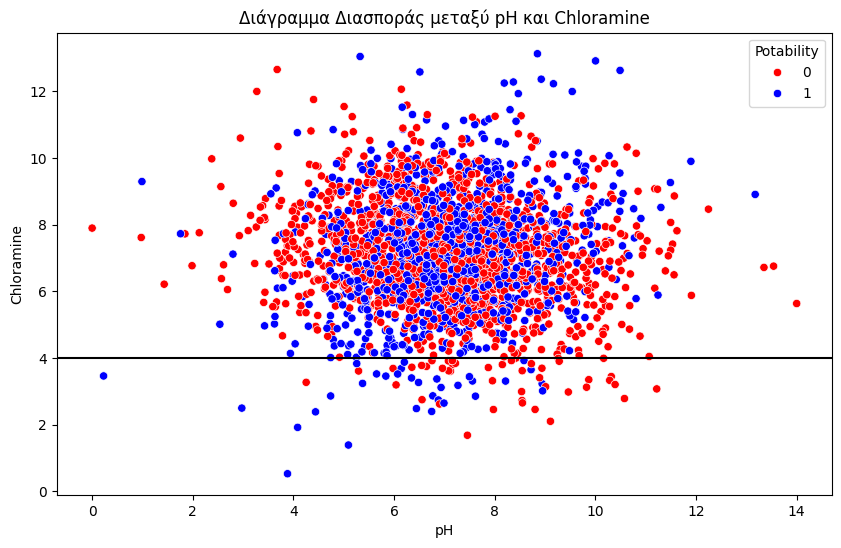

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ph', y='Chloramines', hue='Potability', palette={0: 'red', 1: 'blue'})
plt.title('Διάγραμμα Διασποράς μεταξύ pH και Chloramine')
# Γραμμή y=4, για διαψωρισμό του ppm < 4
plt.axhline(y=4, color='black')
plt.xlabel('pH')
plt.ylabel('Chloramine')
plt.show()

Από το διάγραμμα διασποράς και την γραμμή y=4 που είναι το προτινόμενο όριο του Π.Ο.Υ, φαίνεται πως δεν υπάρχει κάποια προφανής διάκριση μεταξύ πόσιμου και μη πόσιμου νερού, ούτε πάνω αλλά ούτε κάτω από την γραμμή y=4.
Άρα καταλαβαίνουμε ότι το χαρακτηριστικό Chloramine από μόνο του δεν μπορεί να κάνει σωστό διαψωρισμό σε πόσιμα και μη πόσιμα.

# Συμπλήρωση ελλειπών τιμών

In [87]:
# Από το missing_values = df.isnull().sum() είδαμε ότι ελλειπείς τιμές έχουν τα χαρακτηριστικά: ph (491), Sulfate (781) και Trihalomethanes (162)

# Υπολογισμός και εκτύπωση του μέσου όρου για κάθε χαρακτηριστικό
ph_mean = df['ph'].mean()
sulfate_mean = df['Sulfate'].mean()
trihalomethanes_mean = df['Trihalomethanes'].mean()

print(f"Μέση τιμή pH: {ph_mean:.2f}")
print(f"Μέση τιμή Sulfate: {sulfate_mean:.2f}")
print(f"Μέση τιμή Trihalomethanes: {trihalomethanes_mean:.2f}")

# Βήμα 3: Αντικατάσταση των ελλειπών τιμών με τους μέσους όρους κάθε χαρακτηριστικού.
df['ph'].fillna(ph_mean, inplace=True)
df['Sulfate'].fillna(sulfate_mean, inplace=True)
df['Trihalomethanes'].fillna(trihalomethanes_mean, inplace=True)

# Η παραπάνω διαδικασία γίνεται και μόνο με την εντολή: df.fillna(df.mean(), inplace=True)

print("\nΈλεγχος για ελλιπείς τιμές μετά τη συμπλήρωση:")
print(df.isnull().sum())

Μέση τιμή pH: 7.08
Μέση τιμή Sulfate: 333.78
Μέση τιμή Trihalomethanes: 66.40

Έλεγχος για ελλιπείς τιμές μετά τη συμπλήρωση:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/tmp/ipython-input-3601454496.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(ph_mean, inplace=True)
/tmp/ipython-input-3601454496.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

# Διαχωρισμός Δεδομένων σε Inputs/Target και Train/Test

In [88]:
from sklearn.model_selection import train_test_split

x = df.drop('Potability', axis=1).values
y = df['Potability'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Εμφάνισι διαστάσεων
print(f"Διαστάσεις x_train: {x_train.shape}")
print(f"Διαστάσεις y_train: {y_train.shape}")
print(f"Διαστάσεις x_test: {x_test.shape}")
print(f"Διαστάσεις y_test: {y_test.shape}")

Διαστάσεις x_train: (2293, 9)
Διαστάσεις y_train: (2293,)
Διαστάσεις x_test: (983, 9)
Διαστάσεις y_test: (983,)


# Εκπαίδευση και Αξιολόγηση Δέντρου Απόφασης

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ορίζουμε τον αλγόριθμο και χρησιμοποιούμε seed = 0
seed = 0
dt_classifier = DecisionTreeClassifier(random_state=seed)

# Εκπαίδευση μοντέλου
dt_classifier.fit(x_train, y_train)

# Πρόβλεψη στα δεδομένα εκπαίδευσης (y_train_pred) και στα δεδομένα testing (y_test_pred)
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

# Βήμα 5: Υπολογισμός  ακρίβειας για δεδομένα train και test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nΑκρίβεια στο Train Set: {train_accuracy * 100:.2f}%")
print(f"Ακρίβεια στο Test Set: {test_accuracy * 100:.2f}%")


Ακρίβεια στο Train Set: 100.00%
Ακρίβεια στο Test Set: 57.48%


Επειδή δεν δώσαμε κανένα περιορισμό στην εκπαίδευση του μοντέλου (π.χ. max_depth) η ακρίβεια στα δεδομένα εκπαίδευσης είναι 100%, που σημαίνει ότι έχει γίνει overfitting.

# Βελτιστοποίηση υπερπαραμέτρων του δέντρου απόφασης

In [90]:
import itertools

# Ορισμός των τιμών των παραμέτρων που θα δοκιμάσουμε
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.01]
}

# Λίστα που θα εμφανίσει τα αποτελέσματα κάθε μοντέλου
results_list = []

param_names = list(param_grid.keys())

# Δημιουργία όλων των πιθανών συνδυασμών των τιμών
param_combinations = list(itertools.product(*param_grid.values()))
print(f"Συνολικός αριθμός συνδυασμών προς έλεγχο: {len(param_combinations)}")


# Εκπαίδευση και αξιολόγηση για κάθε συνδυασμό
for params in param_combinations:
    # Δημιουργία ένα λεξικού με τον συνδυασμό παραμέτρων
    current_params = dict(zip(param_names, params))

    # Δημιουργία και εκπαίδευση μοντέλου με τις κατάλληλες παραμέτρους
    # Το **current_params περνάει ως ορίσματα τον συνδυασμό των παραμέτρων
    dt_classifier = DecisionTreeClassifier(random_state=0, **current_params)
    dt_classifier.fit(x_train, y_train)

    # Πρόβλεψη
    y_train_pred = dt_classifier.predict(x_train)
    y_test_pred = dt_classifier.predict(x_test)

    # υπολογισμός ακρίβειας
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Αποθηκεύουμε τα αποτελέσματα
    result_row = current_params.copy()
    result_row['train_accuracy'] = train_acc
    result_row['test_accuracy'] = test_acc
    results_list.append(result_row)


# Δημιουργία των αποτελεσμάτων σε dataframe
results_df = pd.DataFrame(results_list)
results_df['train_accuracy'] = (results_df['train_accuracy'] * 100).round(2)
results_df['test_accuracy'] = (results_df['test_accuracy'] * 100).round(2)

# Εμφάνιση του dataframe
display(results_df)

Συνολικός αριθμός συνδυασμών προς έλεγχο: 96


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
0,gini,NaN,2,1,None,0.00,100.00,57.48
1,gini,NaN,2,1,None,0.01,60.53,62.05
2,gini,NaN,2,1,sqrt,0.00,100.00,62.26
3,gini,NaN,2,1,sqrt,0.01,60.53,62.05
4,gini,NaN,2,2,None,0.00,95.16,58.19
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,62.01,62.67
92,entropy,5.0,5,2,None,0.00,67.12,65.51
93,entropy,5.0,5,2,None,0.01,62.01,62.67
94,entropy,5.0,5,2,sqrt,0.00,64.28,62.05


In [91]:
# Εντοπισμός του καλύτερου μοντέλου
best_model_row = results_df.loc[results_df['test_accuracy'].idxmax()]

print("Συνδυασμός με την καλύτερη ακρίβεια στα δεδομένα Test")
print(best_model_row)

Συνδυασμός με την καλύτερη ακρίβεια στα δεδομένα Test
criterion            entropy
max_depth                5.0
min_samples_split          2
min_samples_leaf           2
max_features            None
ccp_alpha                0.0
train_accuracy         67.12
test_accuracy          65.51
Name: 84, dtype: object


# Συνδυασμός με καλύτερο test_accuracy για max_depth=3

In [92]:
from sklearn.tree import plot_tree

# DataFrame μόνο με max_depth = 3.
df_depth_3 = results_df[results_df['max_depth'] == 3]

# Βρίσκουμε τη γραμμή με το μέγιστο test_accuracy για max_depth = 3
best_params_max_depth_3_row = df_depth_3.loc[df_depth_3['test_accuracy'].idxmax()]

print("Ο καλύτερος συνδυασμός παραμέτρων με max_depth=3 ---")
print(best_params_max_depth_3_row)

Ο καλύτερος συνδυασμός παραμέτρων με max_depth=3 ---
criterion            entropy
max_depth                3.0
min_samples_split          2
min_samples_leaf           1
max_features            None
ccp_alpha                0.0
train_accuracy         64.11
test_accuracy          63.99
Name: 64, dtype: object


In [93]:
# Δημιουργία και εκπαίδευση του δέντρου

# Αφαιρούμε τις στήλες της ακρίβειας για να κρατήσουμε μόνο τις υπερπαραμέτρους και τις μετατρέπουμε σε λεξικό για να το περάσουμε στον ταξινομητή.
best_params_max_depth_3_dict = best_params_max_depth_3_row.drop(['train_accuracy', 'test_accuracy']).to_dict()

# Το max_depth από float πρέπει να γίνει int
if pd.notna(best_params_max_depth_3_dict['max_depth']):
    best_params_max_depth_3_dict['max_depth'] = int(best_params_max_depth_3_dict['max_depth'])

# Δημιουργούμε δέντρου.
best_tree_max_dempth_3 = DecisionTreeClassifier(random_state=0, **best_params_max_depth_3_dict)

# Εκπαίδευση
best_tree_max_dempth_3.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

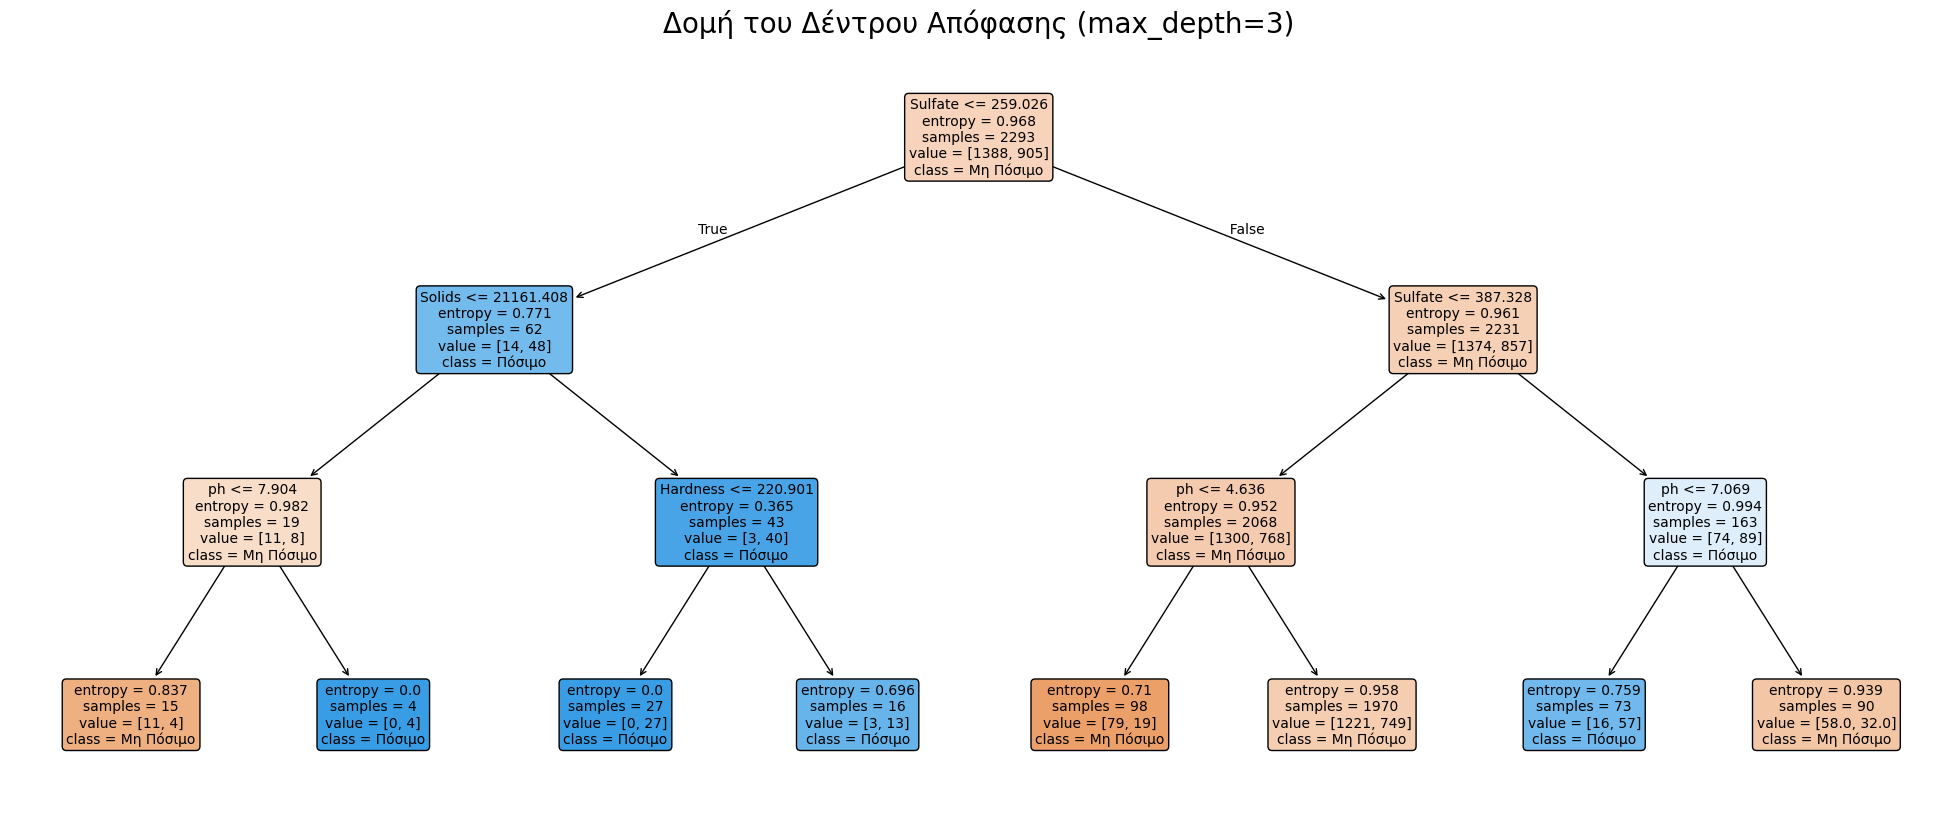

In [94]:
# Οπτικοποίηση δέντρου

# Παίρνουμε τα ονόματα των χαρακτηριστικών από το αρχικό DataFrame και το target
feature_names = df.drop('Potability', axis=1).columns.tolist()
class_names = ['Μη Πόσιμο', 'Πόσιμο']

plt.figure(figsize=(25, 10))
plot_tree(best_tree_max_dempth_3,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Δομή του Δέντρου Απόφασης (max_depth=3)", fontsize=20)
plt.show()

Περιγραφή κανόνων δέντρου:

1.   Διαχωρισμός Sulfate <= 259.026 ppm.
  Αυτό σημαίνει ότι ο αλγόριθμος έκρινε ότι αυτή η συνθήκη δίνει το μεγαλύτερο κέρδος πληροφορίας από όλα τα πιθανά χαρακτηριστικά και συνθήκες.
2.  Διαχωρισμός Solids <= 21161.408

3. Διαχωρισμός: Hardness <= 220.901.
Αυτός ο κανόνας έχει entropy = 0, καθώς ταξινομεί σωστά 27 από τα 27 δείγματα που φτάνουν σε αυτό το φύλλο  ως Πόσιμα.

Στα άλλα φύλλα του δέντρου, έχουμε μεγάλη εντροπία. Αυτό δείχνει ότι σε αυτά τα σημεία παραμένει αβεβαιότητα, καθώς το μοντέλο δεν μπόρεσε να διαχωρίσει πλήρως τις δύο κλάσεις με τους κανόνες που είχε. Άρα, ηταξινόμηση βασισμένη σε αυτά τα φύλλα έχει χαμηλότερη βεβαιότητα.

# Συνδυασμός με τη μεγαλύτερη ακρίβεια στο test και σημαντικότητα χαρακτηριστικών

In [95]:
# Σε προηγούμενο βήμα δείξαμε ότι ο καλύτερος συνδυασμός παραμέτρων είναι:
# criterion: entropy
# max_depth: 5.0
# min_samples_split: 2
# min_samples_leaf: 2
# max_features: None
# ccp_alpha: 0.0
# train_accuracy: 67.12
# test_accuracy: 65.51

# και εχουν αποθηκευτεί στο 'best_model_row'

# Αφαιρούμε τις στήλες της ακρίβειας για να κρατήσουμε μόνο τις υπερπαραμέτρους και τις μετατρέπουμε σε λεξικό για να το περάσουμε στον ταξινομητή.
best_params_dict = best_model_row.drop(['train_accuracy', 'test_accuracy']).to_dict()
# Το max_depth από float πρέπει να γίνει int
if pd.notna(best_params_dict['max_depth']):
    best_params_dict['max_depth'] = int(best_params_dict['max_depth'])

# Δημιουργούμε δέντρου.
best_tree_classifier = DecisionTreeClassifier(random_state=0, **best_params_dict)

# Εκπαίδευση
best_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

In [96]:
# Εξαγωγή και εμφάνιση της σημαντικότητας των χαρακτηριστικών

importances = best_tree_classifier.feature_importances_

# Τα ονόματα των χαρακτηριστικών τα έχουμε από το προηγούμενο βήμα.
feature_names = df.drop('Potability', axis=1).columns

# Δημιουργούμε ένα DataFrame για να συνδυάσουμε τα ονόματα με τις βαθμολογίες και να τα ταξινομήσουμε.
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Σημαντικότητα Χαρακτηριστικών του καλύτερου μοντέλου):")
print(feature_importance_df)

Σημαντικότητα Χαρακτηριστικών του καλύτερου μοντέλου):
           Feature  Importance
4          Sulfate    0.298956
0               ph    0.244768
3      Chloramines    0.191956
1         Hardness    0.091392
2           Solids    0.086400
7  Trihalomethanes    0.053536
8        Turbidity    0.020127
5     Conductivity    0.012864
6   Organic_carbon    0.000000


/tmp/ipython-input-411245246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


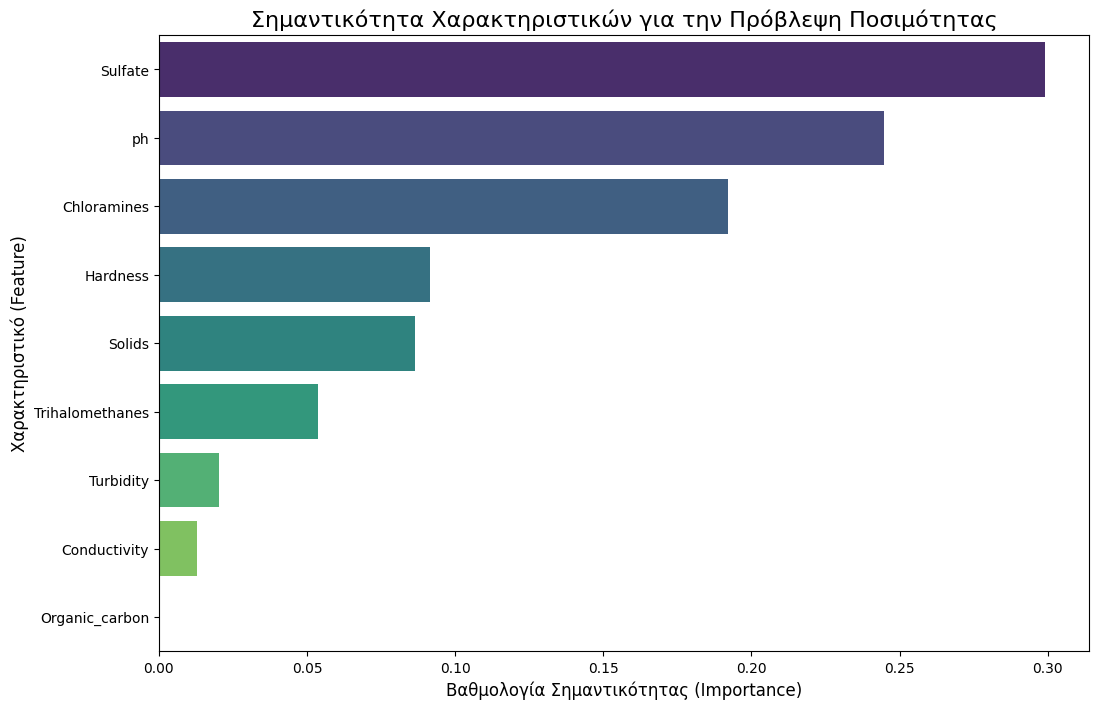

In [97]:
# Δημιουργία Ραβδογράμματος
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Σημαντικότητα Χαρακτηριστικών για την Πρόβλεψη Ποσιμότητας', fontsize=16)
plt.xlabel('Βαθμολογία Σημαντικότητας (Importance)', fontsize=12)
plt.ylabel('Χαρακτηριστικό (Feature)', fontsize=12)
plt.show()

Από τις μετρήσεις και το ραβδόγραμμα, είναι προφανές ότι τα 5 χαρακτηριστικά που μας βοηθάνε να προβλέψουμε καλύτερα αν το νερό είναι πόσιμό είναι:
1.   Sulfate (0.298956)
2.   ph (0.244768)
3.   Chloramines (0.191956)
4.   Hardness (0.091392)
5.   Solids (0.086400)

Επιλέγουμε, δηλαδή, το υποσύνολο των χαρακτηριστικών (5), που σύμφωνα με το μοντέλο μας περιέχει την περισσότερη πληροφορία για την πρόβλεψη πόσιμου/μη πόσιμου νερού. Αγνοώντας τα χαρακτηριστικά με τη χαμηλότερη σημαντικότητα στοχεύουμε στη διατήρηση της μέγιστης δυνατής πρόβλεψης του μοντέλου.

# Random Forest vs Decision Tree

Η βασική ιδέα πίσω από τον αλγόριθμο τυχαίου δάσους είναι ότι ένα μεγάλο πλήθος από μη συσχετιζόμενα δένδρα που αποφασίζουν από κοινού, θα πάρουν καλύτερη απόφαση από κάθε δένδρο ξεχωριστά.

Σε ένα κανονικό δέντρο, αν υπάρχει ένα πολύ ισχυρό χαρακτηριστικό (π.χ. Sulfate) θα επιλεγεί σχεδόν πάντα ως ο πρώτος διαχωρισμός σε όλα τα δέντρα, κάνοντάς τα να μοιάζουν πολύ μεταξύ τους.

Από την άλλη, ο αλγόριθμος Random Forest δεν εξετάζει όλα τα χαρακτηριστικά, αλλά ένα τυχαίο υποσύνολό τους (Bootstrap). Κάθε δέντρο χτίζεται πάνω σε ένα δικό του, δειγματοληπτικά παραγόμενο σύνολο δεδομένων, προερχόμενο από το αρχικό σύνολο δεδομένων του προβλήματος.

Άρα, στο Random Forest, η πρόβλεψη θα γίνει βάση της πλειοψηφίας των δένδρων και αυτό δίνει καλύτερη πρόβλεψη από ότι ένα μόνο δέντρο.

# Εκπαίδευση μοντέλου με Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Συνδυασμός παραμέτρων
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

results_list_rf = []
param_names_rf = list(param_grid_rf.keys())
param_combinations_rf = list(itertools.product(*param_grid_rf.values()))

print(f"Συνολικός αριθμός συνδυασμών Random Forest προς έλεχο: {len(param_combinations_rf)}\n")

# Εκπαίδευση και αξιολόγηση
for params in param_combinations_rf:
    current_params = dict(zip(param_names_rf, params))

    # Δημιουργία και εκπαίδευση μοντέλου
    rf_classifier = RandomForestClassifier(random_state=0, **current_params)
    rf_classifier.fit(x_train, y_train)

    y_train_pred = rf_classifier.predict(x_train)
    y_test_pred = rf_classifier.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    result_row = current_params.copy()
    result_row['train_accuracy'] = train_acc
    result_row['test_accuracy'] = test_acc
    results_list_rf.append(result_row)

# Εμφάνιση αποτελεσμάτων
results_rf_df = pd.DataFrame(results_list_rf)
results_rf_df['train_accuracy'] = (results_rf_df['train_accuracy'] * 100).round(2)
results_rf_df['test_accuracy'] = (results_rf_df['test_accuracy'] * 100).round(2)

print("Πίνακας Αποτελεσμάτων για όλους τους συνδυασμούς του Random Forest:")
display(results_rf_df)

Συνολικός αριθμός συνδυασμών Random Forest προς έλεχο: 144

Πίνακας Αποτελεσμάτων για όλους τους συνδυασμούς του Random Forest:


,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,train_accuracy,test_accuracy
0,50,gini,NaN,2,1,None,100.00,67.24
1,50,gini,NaN,2,1,sqrt,100.00,69.38
2,50,gini,NaN,2,2,None,99.78,66.94
3,50,gini,NaN,2,2,sqrt,99.91,65.82
4,50,gini,NaN,5,1,None,99.87,66.94
...,...,...,...,...,...,...,...,...
139,200,entropy,5.0,2,2,sqrt,68.21,65.21
140,200,entropy,5.0,5,1,None,69.60,66.12
141,200,entropy,5.0,5,1,sqrt,68.38,65.21
142,200,entropy,5.0,5,2,None,69.52,66.02


In [114]:
# Εύρεση καλύτερου συνδυασμού
best_rf_row = results_rf_df.loc[results_rf_df['test_accuracy'].idxmax()]
print("Καλύτερο Μοντέλο Random Forest")
print(best_rf_row)
print(f"\nΥψηλότερη Ακρίβεια στο Test Set: {best_rf_row['test_accuracy']:.2f}%")

Καλύτερο Μοντέλο Random Forest
n_estimators           100
criterion             gini
max_depth              NaN
min_samples_split        2
min_samples_leaf         1
max_features          sqrt
train_accuracy       100.0
test_accuracy        69.79
Name: 49, dtype: object

Υψηλότερη Ακρίβεια στο Test Set: 69.79%


In [119]:
# Εκπαίδευση μοτντέλου Random Forest με τους καλύτερους συνδυασμούς υπερπαραμέτρων
best_rf_params = results_rf_df.sort_values(by='test_accuracy', ascending=False).iloc[0]

best_rf_clf = RandomForestClassifier(
    n_estimators=int(best_rf_params['n_estimators']),
    criterion=best_rf_params['criterion'],
    max_depth=3,
    random_state=0
)
best_rf_clf.fit(x_train, y_train)

feature_importances_rf = best_rf_clf.feature_importances_
# Δημιουργούμε ένα DataFrame για να συνδυάσουμε τα ονόματα με τις βαθμολογίες και να τα ταξινομήσουμε.
feature_importances_rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
feature_importances_rf_df = feature_importances_rf_df.sort_values(by='Importance', ascending=False)

print("Σημαντικότητα Χαρακτηριστικών του καλύτερου μοντέλου RF:")
print(feature_importances_rf_df)

Σημαντικότητα Χαρακτηριστικών του καλύτερου μοντέλου RF:
           Feature  Importance
4          Sulfate    0.340629
0               ph    0.177227
1         Hardness    0.125263
3      Chloramines    0.115448
2           Solids    0.113595
7  Trihalomethanes    0.040324
5     Conductivity    0.032014
6   Organic_carbon    0.031059
8        Turbidity    0.024440


/tmp/ipython-input-4056688702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf_df, palette='viridis')


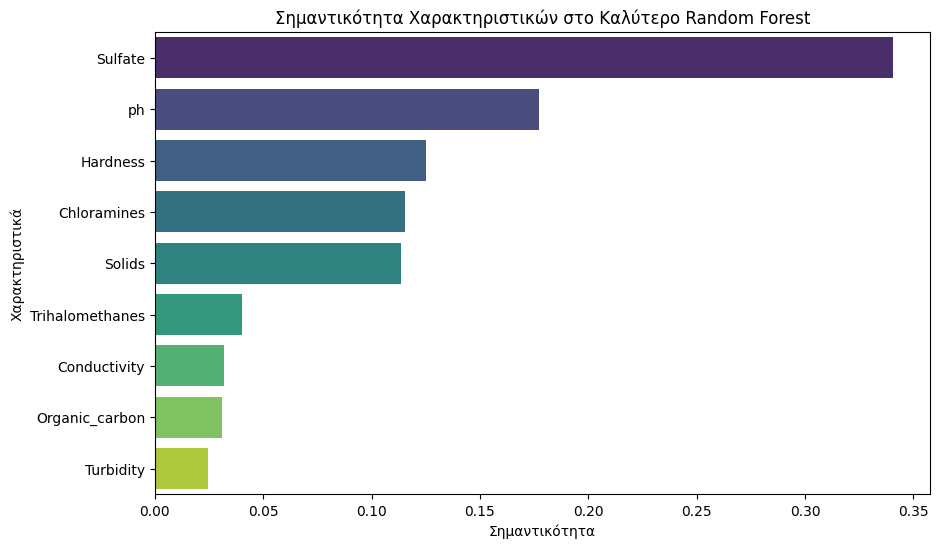

In [118]:
# Οπτικοποίηση σημαντικότητας χαρακτηριστικών

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf_df, palette='viridis')
plt.title('Σημαντικότητα Χαρακτηριστικών στο Καλύτερο Random Forest')
plt.xlabel('Σημαντικότητα')
plt.ylabel('Χαρακτηριστικά')
plt.show()

Φαίνεται ότι Random Forest παίρνει περισσότερη πληροφορία από διαφορετικά χαρακτηριστικά και δεν εξαρτάται υπερβολικά από λίγα χαρακτηριστικά όπως στο Desicion Tree.

# False Positive vs False Negative

Πιο σημαντικό είναι το μοντέλο να προβλέπει σωστά το μη-πόσιμο νερό, ακόμα κι αν χάσει λίγη ακρίβεια στο πόσιμο.
Αυτό γιατί το να χαρακτηρίσει λανθασμένα το μη-πόσιμο νερό ως πόσιμο μπορεί να έχει σοβαρές συνέπειες για την υγεία.

Το Random Forest, ως συνολική πρόβλεψη πολλών δέντρων, είναι πολύ πιο σταθερό και γενικεύει καλύτερα σε πραγματικές συνθήκες. Αυτή η αξιοπιστία μειώνει δραστικά τον κίνδυνο του καταστροφικού λάθους, καθιστώντας το ασφαλέστερη επιλογή από το Desicion Tree, το οποίο είναι ευάλωτο στο overfitting.